In [5]:
import numpy as np 
import matplotlib.pyplot as plt# raw_data_x是特征，raw_data_y是标签，0为良性，1为恶性
raw_data_X = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343853454, 3.368312451],
              [3.582294121, 4.679917921],
              [2.280362211, 2.866990212],
              [7.423436752, 4.685324231],
              [5.745231231, 3.532131321],
              [9.172112222, 2.511113104],
              [7.927841231, 3.421455345],
              [7.939831414, 0.791631213]
             ]

In [17]:
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]# 设置训练组
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)

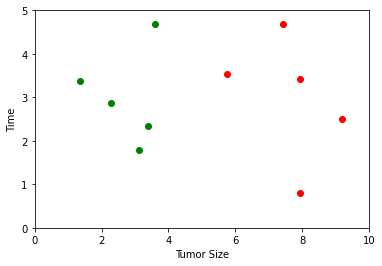

In [20]:
# 将数据可视化
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1], color='g', label = 'Tumor Size')
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1], color='r', label = 'Time')
plt.xlabel('Tumor Size')
plt.ylabel('Time')
plt.axis([0,10,0,5])
plt.show()


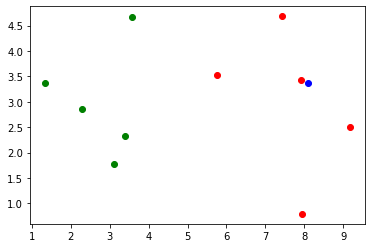

In [21]:
#添加预测数据
x = np.array([8.093607318, 3.365731514])

plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], color='g')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], color='r')
plt.scatter(x[0], x[1], color='b')
plt.show()

In [22]:
from math import sqrt
distances = []
# 在特征空间中，计算训练集样本中的所有点与新样本的点的欧拉距离
for x_train in X_train:
    d = sqrt(np.sum((x_train - x)**2))
    distances.append(d)

In [23]:
distances

[4.812566907609877,
 5.229270827235305,
 6.74975435744285,
 4.698833118314581,
 5.834600377093542,
 1.4800180830963527,
 2.35426403399514,
 1.3760615737178983,
 0.17488150542755523,
 2.578689471080089]

In [24]:
# 也可以用list的生成表达式实现
# distances = [sqrt(np.sum((x_train - x)**2))
#              for x_train in X_train]

In [25]:
nearest = np.argsort(distances)
nearest

array([8, 7, 5, 6, 9, 3, 0, 1, 4, 2])

In [26]:
k = 6

In [27]:
topK_y = [y_train[neighbor] for neighbor in nearest[:k]]

In [28]:
topK_y

[1, 1, 1, 1, 1, 0]

In [29]:
from collections import Counter
votes = Counter(topK_y)


In [30]:
votes

Counter({1: 5, 0: 1})

In [43]:
predict_y=votes.most_common(1)[0][0]

In [44]:
predict_y

1

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
kNN_classifier = KNeighborsClassifier(n_neighbors=6)

In [47]:
kNN_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [57]:
#X_predict = x.reshape(1,-1)
kNN_classifier.predict(X_predict)

array([1])

In [58]:
X_predict

array([[8.09360732, 3.36573151]])

In [59]:
y_predict = kNN_classifier.predict(X_predict)
y_predict[0]

1